In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import scripts.read_image_data_scaleable as rid
import blaze

/home/mithrillion/anaconda3/lib/python3.5/site-packages/flask/exthook.py:71: ExtDeprecationWarning: Importing flask.ext.cors is deprecated, use flask_cors instead.
  .format(x=modname), ExtDeprecationWarning


In [2]:
from importlib import reload
reload(rid)

<module 'scripts.read_image_data_scaleable' from '/home/mithrillion/Projects/EarthEngine/scripts/read_image_data_scaleable.py'>

In [3]:
ds = rid.read_image_data(image_dir='area1/2014/images/', mask_dir='area1/2014/masks/', 
                         table_dir='area1/2014/tables/LC8_SR.csv', 
                         shelve_dir='models/area1/shelves/2014/', 
                         processes=8)

In [4]:
ds_new = rid.read_image_data(image_dir='area1/2015/images/', mask_dir='area1/2015/masks/', 
                         table_dir='area1/2015/tables/LC8_SR.csv', 
                         shelve_dir='models/area1/shelves/2015/', 
                         processes=8)

In [5]:
keys_new = list(ds_new.keys())

In [6]:
keys_int = [int(k) for k in keys_new]

In [7]:
times_to_fit = []
for t in keys_int:
    dt = datetime.datetime.fromtimestamp(t / 1000)
    dt = dt.replace(year=dt.year - 1)
    times_to_fit += [int(dt.timestamp() * 1000)]

In [8]:
imgs = rid.interpolate_images(times_to_fit, ds, max_days_apart=15, processes=8, 
                              shelve_dir='models/area1/shelves/')

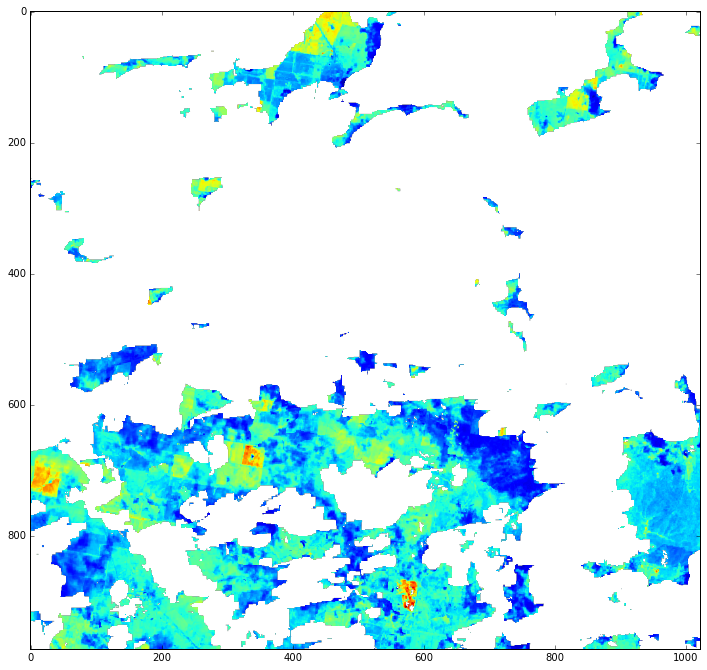

In [9]:
plt.figure(figsize=(12, 12))
img = imgs[list(imgs.keys())[10]][0, :, :]
plt.imshow(np.ma.masked_where((img == -999) | (img == 0), img))

In [10]:
pix = rid.store_set(imgs, processes=8, shelve_dir='models/area1/shelves/2014/')

In [11]:
res = imgs[list(imgs.keys())[10]].shape[1:]
res

(973, 1022)

In [12]:
train = rid.combine_set(pix, shelve_dir='models/area1/shelves/2014/', res=res, processes=8)

In [13]:
train['0'].shape

(250000, 120)

In [14]:
list(train.keys())

['0', '1', '3', '2']

In [15]:
train['3'].shape

(244405, 120)